In [13]:
from vedo import *


vedo.volume.Volume at (0x561f87f81140)                                     
name          : Volume
filename      : ./../ppujol/super_collapsed/pieces/cell.tif
dimensions    : [300 300 300]
origin        : (0, 0, 0)
center        : (149.500, 149.500, 149.500)
spacing       : (1.00000, 1.00000, 1.00000)
bounds        : x=(0, 299), y=(0, 299), z=(0, 299)
memory size   : 51 MB
scalar size   : 2 bytes (unsigned short)
scalar range  : (0.0, 65535.0)


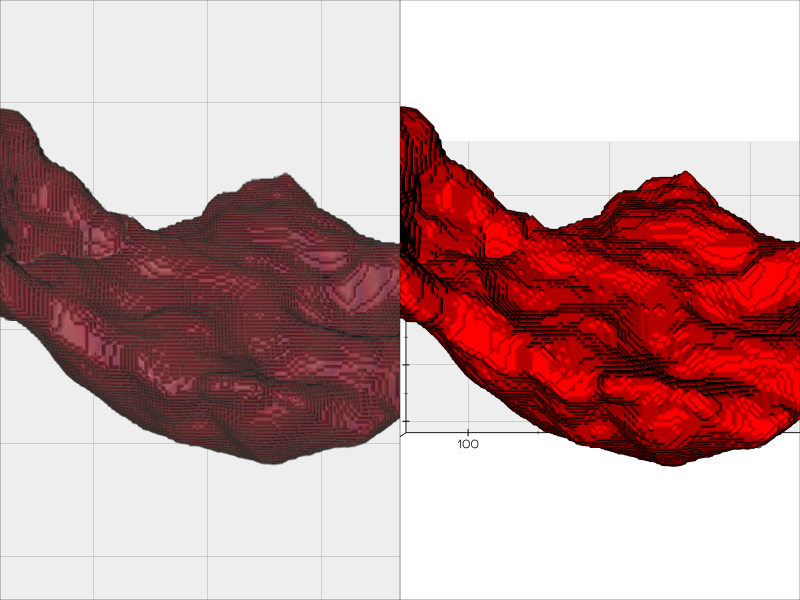

In [14]:
vol = Volume('./../ppujol/super_collapsed/pieces/cell.tif').print()
iso = vol.isosurface(1)

show(vol, iso, N=2, axes=1)


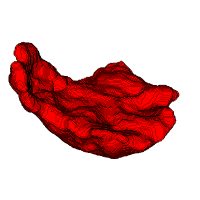

In [15]:
iso.write("subcellular.obj")

In [2]:
from dw3d import geometry_reconstruction_3d
import skimage as sk

cell = sk.io.imread('edt_single_cell_time_7.tif')
original = sk.io.imread('cell_cube_time_7.tif')

cell[cell > 0] = 1

In [3]:
DW = geometry_reconstruction_3d(cell, min_dist=1, expansion_labels=0, mode='skimage', original_image=original)
DW.plot_cells_polyscope()
v = DW.plot_in_napari(add_mesh=True)

## Use the mesh to analyze the geometry:
Mesh=DW.return_dcel()
Mesh.compute_curvatures_interfaces()
Mesh.compute_areas_interfaces()
Mesh.compute_volumes_cells()
Mesh.compute_length_trijunctions()
Mesh.compute_angles_junctions()

[polyscope] Backend: openGL3_glfw -- Loaded openGL version: 4.6 (Core Profile) Mesa 23.0.4-0ubuntu1~22.04.1


{}

In [11]:
import os
import skimage as sk
import numpy as np
import tifffile as tiff

def normalize_image(im, mult_factor = 1):
    norm_im = (im - im.min()) / (im.max()-im.min()) * mult_factor
    return norm_im
def reverse_values(im):
    rev_im = im.max()-im
    return rev_im

total = np.zeros((300,300,300))
for piece in os.listdir('./../ppujol/super_collapsed/pieces/'):
    if piece != 'image.tif':
        p = sk.io.imread('./../ppujol/super_collapsed/pieces/'+piece)
        total += p

total[total > 0] = 1
tiff.imwrite('./../ppujol/super_collapsed/pieces/cell.tif', normalize_image(total, 65535).astype(np.uint16), imagej=True)
